In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np

# Specify the path to your .npy file
file_path = '/content/drive/MyDrive/X_train_tabular.npy'

# Load the .npy file
x = np.load(file_path)

# Print the array values
print("Array Values:")
print(x)


Array Values:
[[-2.8512097e-06  3.3552608e-06  1.5988660e-06 ...  1.4699236e-06
  -5.6090889e-06  4.0180992e-05]
 [-4.6977384e-06  3.3552124e-06  1.4304406e-06 ...  2.4781623e-06
  -3.2593930e-06  4.9580311e-05]
 [-2.6837340e-06  4.0265595e-06  9.2631649e-07 ...  2.4793057e-06
  -7.0452693e-08  4.7062331e-05]
 ...
 [ 1.2604414e-05  3.4272251e-08 -2.9844853e-07 ... -1.0334954e-05
  -9.0856147e-06 -2.2172696e-06]
 [ 4.8833322e-06 -6.3691493e-07 -1.8085398e-06 ... -4.9637788e-06
  -1.0932163e-05 -1.0424706e-06]
 [ 2.7012754e-06 -1.6438012e-06 -4.6614246e-06 ...  1.4842431e-05
  -1.1603769e-05  1.3072749e-06]]


In [3]:
len(x)

4361620

In [4]:
x.shape

(4361620, 12)

In [5]:

# Specify the path to your .npy file
file_path = '/content/drive/MyDrive/y_train_tabular.npy'

# Load the .npy file
y = np.load(file_path)

# Print the array values
print("Array Values:")
print(y)


Array Values:
[[ 7.80701727 14.62264061 32.20779657 ... 52.83019066  8.73786449
  62.36842453]
 [ 7.80701727 14.62264061 32.20779657 ... 52.83019066  8.73786449
  62.36842453]
 [ 7.80701727 14.62264061 32.20779657 ... 52.83019066  8.73786449
  62.36842453]
 ...
 [ 6.65093914 12.72727251 24.16666746 ... 98.12293768 57.67605007
  65.25891781]
 [ 6.64944917 12.72727251 24.16666746 ... 98.09273243 57.67605007
  65.27244151]
 [ 6.64795786 12.72727251 24.16666746 ... 98.06253433 57.67605007
  65.28595984]]


In [6]:
len(y)

4361620

In [7]:
y.shape

(4361620, 14)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X is your input data and Y is your target data
# Convert your numpy arrays to PyTorch tensors
X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32)

In [9]:
  X

tensor([[-2.8512e-06,  3.3553e-06,  1.5989e-06,  ...,  1.4699e-06,
         -5.6091e-06,  4.0181e-05],
        [-4.6977e-06,  3.3552e-06,  1.4304e-06,  ...,  2.4782e-06,
         -3.2594e-06,  4.9580e-05],
        [-2.6837e-06,  4.0266e-06,  9.2632e-07,  ...,  2.4793e-06,
         -7.0453e-08,  4.7062e-05],
        ...,
        [ 1.2604e-05,  3.4272e-08, -2.9845e-07,  ..., -1.0335e-05,
         -9.0856e-06, -2.2173e-06],
        [ 4.8833e-06, -6.3691e-07, -1.8085e-06,  ..., -4.9638e-06,
         -1.0932e-05, -1.0425e-06],
        [ 2.7013e-06, -1.6438e-06, -4.6614e-06,  ...,  1.4842e-05,
         -1.1604e-05,  1.3073e-06]])

In [10]:
Y

tensor([[ 7.8070, 14.6226, 32.2078,  ..., 52.8302,  8.7379, 62.3684],
        [ 7.8070, 14.6226, 32.2078,  ..., 52.8302,  8.7379, 62.3684],
        [ 7.8070, 14.6226, 32.2078,  ..., 52.8302,  8.7379, 62.3684],
        ...,
        [ 6.6509, 12.7273, 24.1667,  ..., 98.1229, 57.6760, 65.2589],
        [ 6.6494, 12.7273, 24.1667,  ..., 98.0927, 57.6760, 65.2724],
        [ 6.6480, 12.7273, 24.1667,  ..., 98.0625, 57.6760, 65.2860]])

In [11]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    print("GPU is available!")
else:
    print("GPU is not available. Using CPU.")

GPU is available!


preprocessing unit

In [12]:
# class Processing_unit(nn.Module):
#   def __init__(self):
#     super(Processing_unit , self).__init__()
#     self.ff= nn.Linear(12,1728) # 12**3

#   def forward(self,x):
#     x=self.ff(x)
#     return x

CNN Archticture

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()   # ((n+ 2p -f) / st ) +1  # 16
        self.ff= nn.Linear(12,1728) # 12**3
        # self.X= X.reshape((-1, 100, 16))
        self.conv1 = nn.Conv1d(108, 256, kernel_size=3, stride=1, padding=1)  # 32 ll input channels | 64 ll output channels #16
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2) # 2  # b2t 8
        self.conv2 = nn.Conv1d(256, 512, kernel_size=3, stride=1, padding=1) # 64 input channels | 128 output channels   #  8
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2) #2   #4
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 4, 128) # 4 --> sequence length //4(34an 3aml 2 maxpool kol wa7da b 2)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 14)  # Output


    def forward(self, x):
        x= self.ff(x)
        x= x.reshape((-1,108,16))
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


In [14]:
# class CombinedModel(nn.Module):
#     def __init__(self, ann, cnn):
#         super(CombinedModel, self).__init__()
#         self.ann = ann
#         self.cnn = cnn

#     def forward(self, x):
#         # Forward pass through ANN
#         x_ann = self.ann(x)

#         # Forward pass through CNN with the output of ANN as input
#         x_cnn = self.cnn(x_ann)

#         return x_cnn

In [15]:
#processing_model = Processing_unit()
cnn_model = CNN()

# Combine them into a single model
#combined_model = CombinedModel(processing_model, cnn_model)

# Move the entire combined model to GPU if available
if torch.cuda.is_available():
    cnn_model = cnn_model.to('cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)


epochs = 10
batch_size = 50000


dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


Epoch 1/10, Loss: 314.07281494140625
Epoch 2/10, Loss: 312.0831298828125
Epoch 3/10, Loss: 316.4545593261719
Epoch 4/10, Loss: 322.19647216796875
Epoch 5/10, Loss: 321.17144775390625
Epoch 6/10, Loss: 317.9806823730469
Epoch 7/10, Loss: 315.64532470703125
Epoch 8/10, Loss: 315.44671630859375
Epoch 9/10, Loss: 316.6859436035156
Epoch 10/10, Loss: 318.131591796875


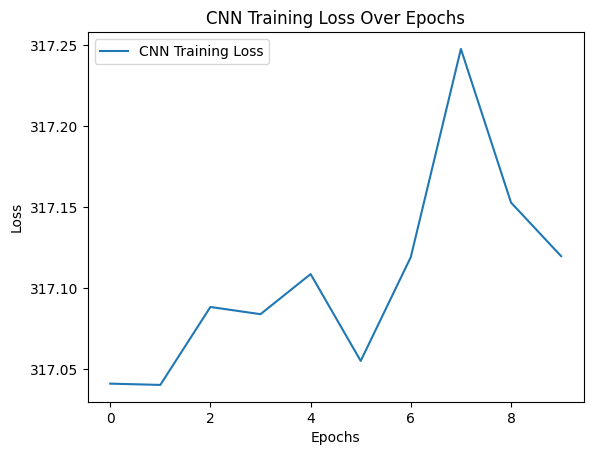

In [20]:
import matplotlib.pyplot as plt

# Store the training loss for plotting

all_losses=[]
# Training loop
for epoch in range(epochs):
    epochloss=0.0
    for batch_X, batch_Y in dataloader:
        if torch.cuda.is_available():
          batch_X, batch_Y  = batch_X.to('cuda'), batch_Y.to('cuda')
        optimizer.zero_grad()
        output = cnn_model(batch_X)
        loss = criterion(output, batch_Y)
        loss.backward()
        optimizer.step()
        epochloss += loss.item()
    # Calculate average loss for the epoch
    avg_epoch_loss = epochloss / len(dataloader)
    all_losses.append(avg_epoch_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

plt.plot(all_losses, label='CNN Training Loss')
plt.savefig('CNN.png')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training Loss Over Epochs')
plt.legend()
plt.show()


In [17]:
%matplotlib inline

conclusion :
CNN is better than DNN but still bad and i think that due to the tabular data dont save the sequence of motion so the better to use RNN & LSTM with the sequence data to save the sequence